# House Price Prediction

## 1. Import the libraries and load the dataset

In [3]:
# House Pricing dataset 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("C:\\Users\\hbhan\\OneDrive\\Himanshu_Bhandari\\Projects for portfolio\\India_House_Pricing\\House Price India.csv")
df.head()


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


## 2. Inspecting the data and make necessary changes.

In [5]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [6]:
print(df.info())
print(df.columns)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

### Converting the column names to the lower case and removing the extra space and adding an underscore in the column names.

In [8]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head()

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


### Handle Missing Values

In [10]:
print("Missing Values:", df.isnull().sum())

Missing Values: id                                       0
date                                     0
number_of_bedrooms                       0
number_of_bathrooms                      0
living_area                              0
lot_area                                 0
number_of_floors                         0
waterfront_present                       0
number_of_views                          0
condition_of_the_house                   0
grade_of_the_house                       0
area_of_the_house(excluding_basement)    0
area_of_the_basement                     0
built_year                               0
renovation_year                          0
postal_code                              0
lattitude                                0
longitude                                0
living_area_renov                        0
lot_area_renov                           0
number_of_schools_nearby                 0
distance_from_the_airport                0
price                                 

* Interpretation: There are no null values in any of the columns.

## 3. Exploratory Data Analysis

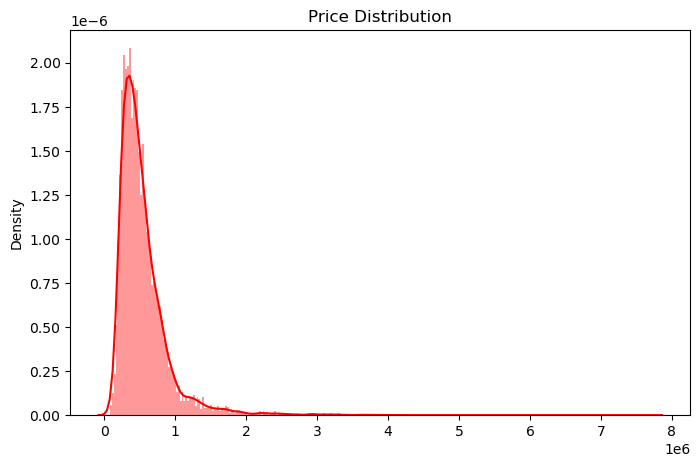

In [13]:
#1. Distribution of Target column (Price):
plt.figure(figsize = (8,5))
sns.distplot(x = df["price"], bins = "auto", color = "red")
plt.title("Price Distribution")
plt.show()

* Interpretation: The data is heavily skewed to the right. This means that most of the prices are concentrated at the lower end ot the spectrum, with a longer tail extending to the right.

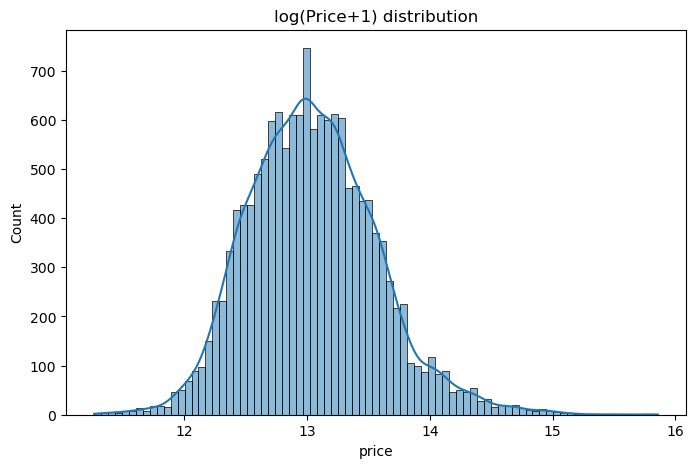

In [15]:
#2. Visualizing the log transform since the price column is heavily skewed.
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['price']), kde=True)
plt.title('log(Price+1) distribution')
plt.show()

* Interpretation: The data after using the log transformation appears to be much more normally distributed, resembling a bell curve. This makes it more suitable for statistical models that assume a normal distribution.

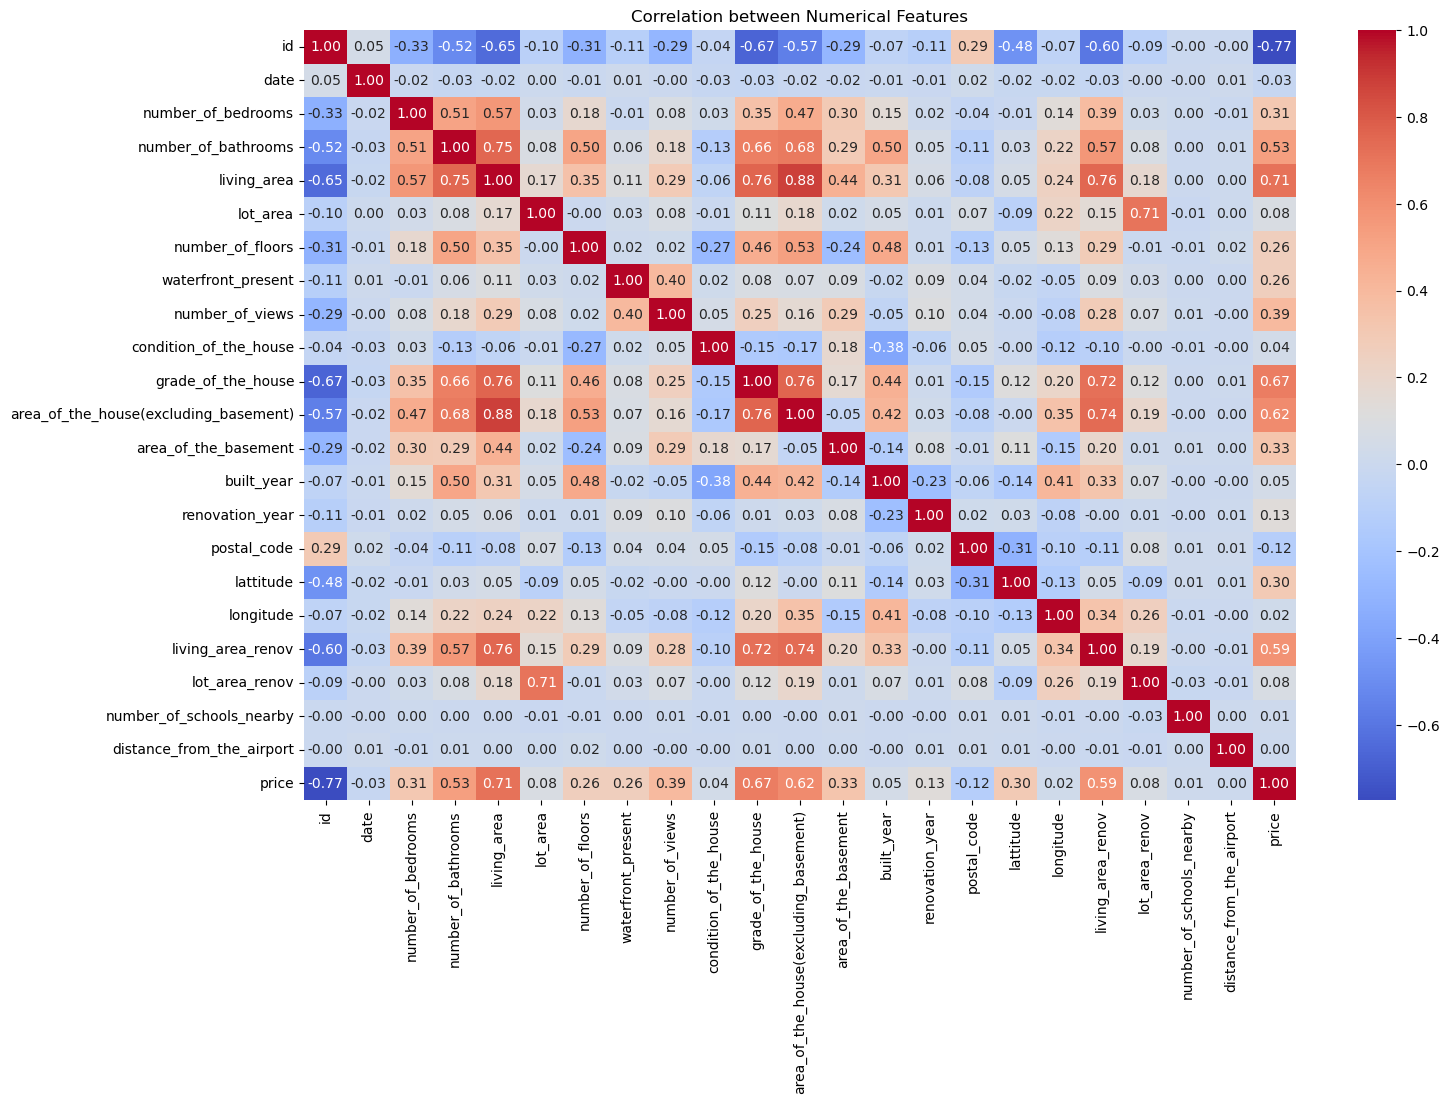

In [17]:
#3. Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df.select_dtypes(include = "number").corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlation between Numerical Features")
plt.show()

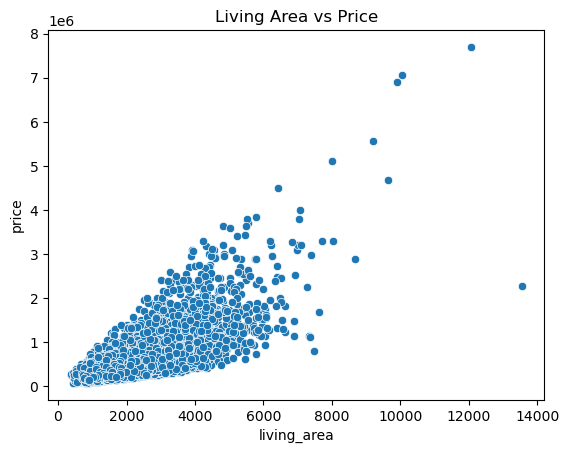

In [18]:
#4. Scatter Plot between Living Area and Price
sns.scatterplot(x = "living_area", y = "price", data = df)
plt.title("Living Area vs Price")
plt.show()

* Interpretation: The plot indicated that a larger living area generally corresponds to a higher price. Therefore, there is a clear positive correlation between living area and price.
    * There a few data points that stand out, with very high prices for their living area. These could be considered outliers or might represent luxury homes or properties in a highly desirable location.

## 4. Feature Engineering and Drop Irrelevant Columns

In [21]:
df.drop(columns = "id", inplace = True)

if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors = "coerce")
    df["sale_year"] = df["date"].dt.year
    df["sale_month"] = df["date"].dt.month
    df.drop(columns = ["date"], inplace = True)

# Creating the house age from built year
if "built_year" in df.columns:
    current_year = df["sale_year"].max() if "sale_year" in df.columns else pd.Timestamp.now().year
    df["house_age"] = current_year - df["built_year"]
    # Dropping the built year
    df.drop(columns = ["built_year"], inplace = True)

* Interpretation: More meaningful features (sale_year, sale_month, house_age) have been created using the data column and irrelevant columns have been removed to prepare the dataset for modelling.

## 5. Outlier Detection and Removal (using IQR method)

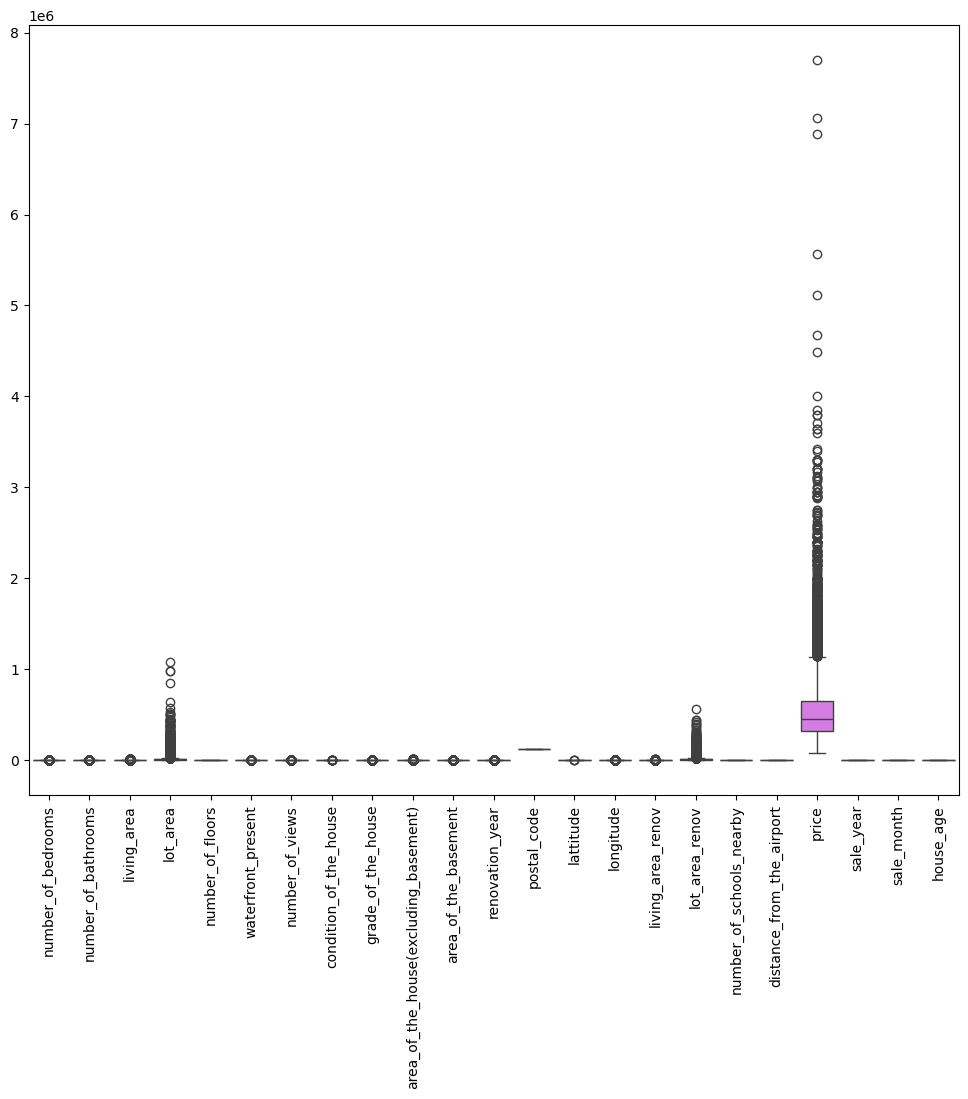

In [24]:
plt.figure(figsize=(12,10))
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.show()

* Interpretation: The boxplot confirms the presence of outliers in key features like price, living_area, and lot_area, which is a common characteristic of real-world housing data.

In [26]:
df_capped = df.copy()
def cap_outliers_iqr(df, columns):
    """
    Caps outliers in the given columns of a DataFrame using the IQR method.
    
    Parameters:
        df (pd.DataFrame): Your dataframe
        columns (list): List of column names to cap
        
    Returns:
        pd.DataFrame: DataFrame with capped outliers
    """
    
    
    for col in columns:
          Q1 = df_capped[col].quantile(0.25)
          Q3 = df_capped[col].quantile(0.75)
          IQR = Q3 - Q1
          lower_cap = Q1 - 1.5 * IQR
          upper_cap = Q3 + 1.5 * IQR
            
          df_capped[col] = np.where(df_capped[col] < lower_cap, lower_cap, df_capped[col])
          df_capped[col] = np.where(df_capped[col] > upper_cap, upper_cap, df_capped[col])

    
    return df_capped


* Interpretation: The IQR method is used to cap the outliers by their threshold values. This prevents extreme values from influencing a machine learning model while retaining the overall distribution of the data. This is a crucial step in preparing the data for modelling.

In [28]:
columns = df_capped.columns
df_cleaned = cap_outliers_iqr(df_capped,columns)

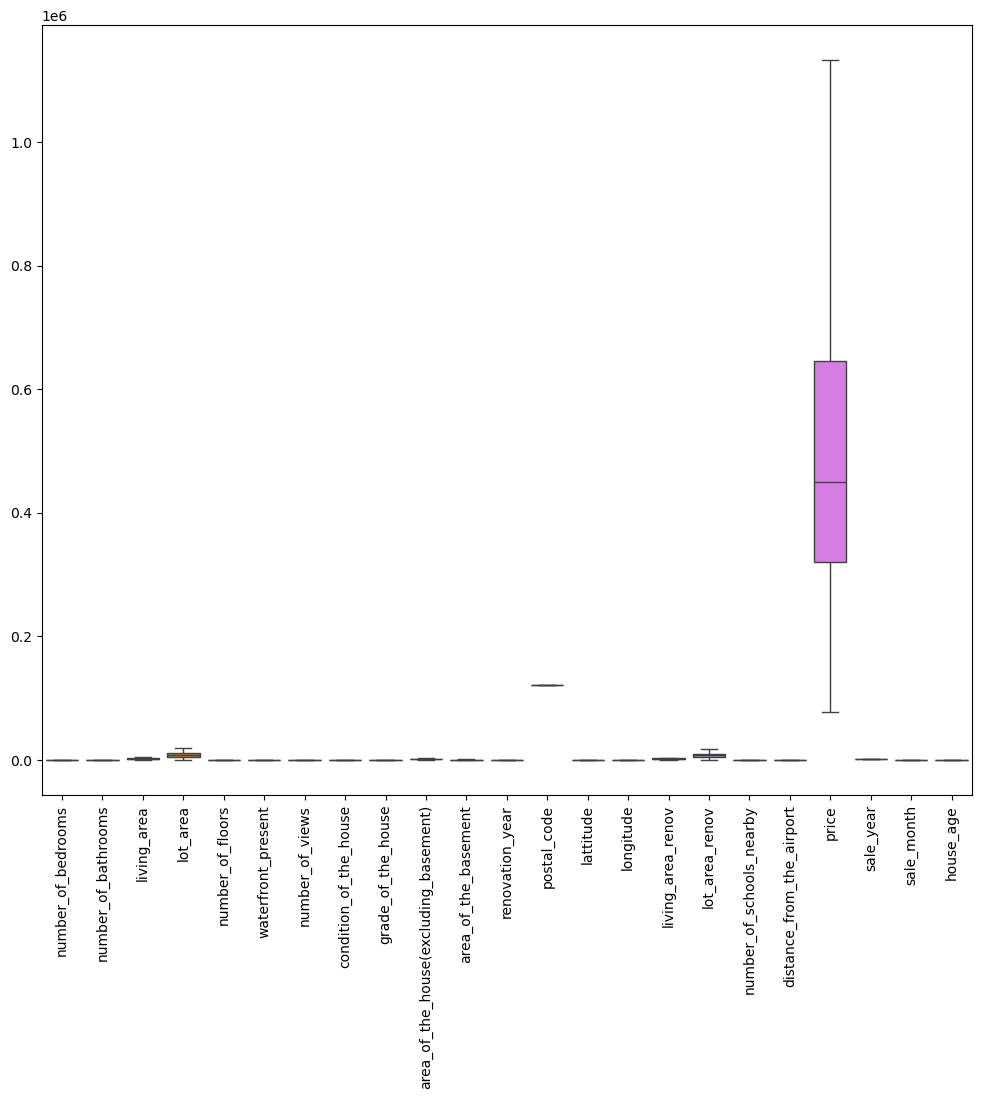

In [29]:
plt.figure(figsize=(12,10))
sns.boxplot(data = df_cleaned)
plt.xticks(rotation = 90)
plt.show()

## 6. Log Transformation

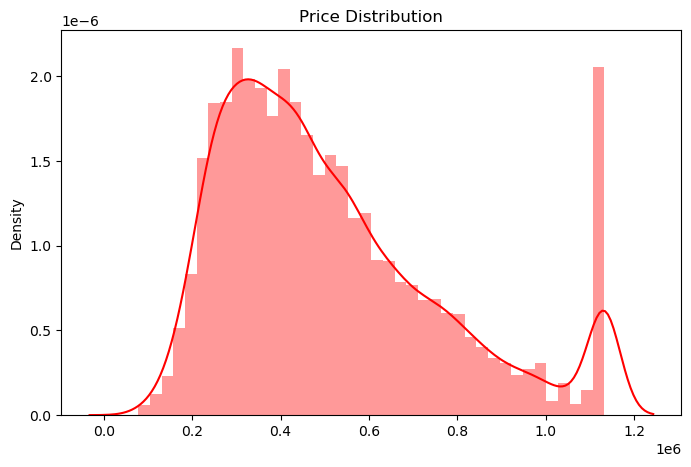

In [31]:
plt.figure(figsize = (8,5))
sns.distplot(x = df_cleaned["price"], bins = "auto", color = "red")
plt.title("Price Distribution")
plt.show()

In [32]:
df_cleaned["price"].skew()

0.940919506441171

* Interpretation: The original price column had a skewness value of 0.94, indicating a moderate right skew in the data distribution. Right-skewed data can negatively impact the performance of regression models because it violates the assumption of normally distributed residuals and can lead to biased parameter estimates. To address this, I applied a log transformation to the price values.

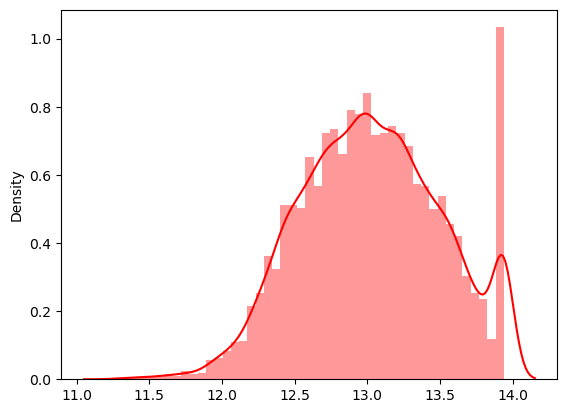

-0.03959728297091646


In [34]:
# Fixing the skewness in the target feature.
df_cleaned["price"] = np.log1p(df_cleaned["price"])

sns.distplot(x = df_cleaned["price"], color = "red")
plt.show()

print(df_cleaned["price"].skew())

## 7. Feature Selection 

In [36]:
X = df_cleaned.drop(columns = ["price"]) # Independent Features

y = df_cleaned["price"]                                                      # Target Feature

* Interpretation: I have dropped the price column from the independent features and taken it as the dependent feature because we are predicting the price for the new input values using machine learning
   models.

## 8. Train-Test-Split

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


## 9. Feature Scaling 

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


* Interpretation: In Linear Regression, scaling the data ensures that all features contribute equally to the model. When features have different units or ranges, variables with larger values can disproportionately influence the calculation of coefficients, potentially biasing the model. We will be using the scaled data only for the Linear Regression and not for the Random Forest because the random forest models can make predictions on the unscaled data as well.

## 10. Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

# Predictions and Evaluation scores
y_pred_lr = lr.predict(X_test_scaled)

r2 = r2_score(y_test,y_pred_lr)
mae = mean_absolute_error(y_test,y_pred_lr)
mse = mean_squared_error(y_test,y_pred_lr)

print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

R² Score: 0.76
MAE: 0.18
MSE: 0.06


* Interpretation: The R² score of 0.76 means the model explains 76% of the variance in the target variable. The MAE of 0.18 indicates the average prediction error is about 0.18 units, while the MSE of 0.06 shows that large errors are rare, suggesting good predictive accuracy.

## 11. Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

# Prediction
y_pred_rf = rf.predict(X_test)

# Evaluation Metrics
r2_rf = r2_score(y_pred_rf,y_test)
mae_rf = mean_absolute_error(y_pred_rf,y_test)
mse_rf = mean_squared_error(y_pred_rf,y_test)

print("Random Forest Regressor Evaluation Metrics")
print(f"R2 Score: {r2_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")

Random Forest Regressor Evaluation Metrics
R2 Score: 0.87
MAE: 0.11
MSE: 0.03


* Interpretation: The R² score of 0.87 means the model explains 87% of the variance in the target variable, showing strong predictive capability. The MAE of 0.11 indicates very low average error, and the MSE of 0.03 confirms minimal large deviations in predictions.
Since Random Forest outperforms Linear Regression (R² = 0.76, higher MAE and MSE) and handles non-linear relationships, it is the preferred model for this dataset.

## 12. Gradient Boosting Regressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
gbr = GradientBoostingRegressor(random_state = 42, n_estimators = 200, learning_rate = 0.1)
gbr.fit(X_train,y_train)

# Predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluation Metrics
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)

print("Gradient Boosting Regressor Metrics")
print(f"R² Score: {r2_gbr:.4f}")
print(f"MAE: {mae_gbr:.2f}")
print(f"RMSE: {rmse_gbr:.2f}")

Gradient Boosting Regressor Metrics
R² Score: 0.8804
MAE: 0.12
RMSE: 0.17


In [53]:
df_cleaned.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'renovation_year', 'postal_code', 'lattitude', 'longitude',
       'living_area_renov', 'lot_area_renov', 'number_of_schools_nearby',
       'distance_from_the_airport', 'price', 'sale_year', 'sale_month',
       'house_age'],
      dtype='object')

### 13. Predicting the price of a new input.

In [55]:
# New input dictionary
new_input = {
    'number_of_bedrooms': 3,
    'number_of_bathrooms': 2,
    'living_area': 1800,
    'lot_area': 5000,
    'number_of_floors': 1,
    'waterfront_present': 0,
    'number_of_views': 2,
    'condition_of_the_house': 4,
    'grade_of_the_house': 7,
    'area_of_the_house(excluding_basement)': 1500,
    'area_of_the_basement': 300,
    'renovation_year': 2015,
    'postal_code': 560001,
    'lattitude': 47.5112,
    'longitude': -122.257,
    'living_area_renov': 1600,
    'lot_area_renov': 4800,
    'number_of_schools_nearby': 3,
    'distance_from_the_airport': 20,
    'price': 0,
    'sale_year': 2025,
    'sale_month': 8,
    'house_age': 10
}

# Convert to DataFrame
new_input_df = pd.DataFrame([new_input])

# Drop 'price' since it's the target variable
X_new = new_input_df.drop(columns=['price'])

# Prediction of the Price
predicted_price = rf.predict(X_new)
print(f"Predicted Price: {predicted_price[0]}")


Predicted Price: 13.067164696702319


In [56]:
import numpy as np

# Random Forest model's predicted log(price)
predicted_log_price = 13.06

# Convert back to original price
predicted_price = np.exp(predicted_log_price)

print(f"Predicted Price (Rs): {predicted_price:.2f}")


Predicted Price (Rs): 469770.71


* Interpretation: The predicted price of ₹4,69,770 was obtained using the Random Forest Regressor, which showed strong performance in evaluation metrics. Since the target variable was log-transformed during preprocessing, we applied the exponential function (exp) to the model’s output to convert it back to its original price scale. This ensures the predicted value accurately reflects the real-world pricing scenario based on the learned patterns from historical data.